Panel shape (Days x Issuers): (93, 25)

First few rows:
                  AAPL      ABBV       AEP      AMZN       CAT       COP  \
trd_exctn_dt                                                               
2025-11-03    4.028535  4.000716  4.862712  4.261461  3.939934  4.842488   
2025-11-04    4.028920  4.218057  4.754828  4.242528  3.955205  4.599788   
2025-11-05    4.079458  4.119549  4.853917  4.248478  4.037803  4.846982   
2025-11-06    3.967017  4.113120  4.768531  4.160414  3.930120  4.598877   
2025-11-07    4.007728  4.124220  4.907577  4.178174  3.888334  4.818525   

                   CVX       DUK      GOOG        GS  ...       MRK        MS  \
trd_exctn_dt                                          ...                       
2025-11-03    4.132015  4.466849  4.648938  4.562385  ...  4.310938  4.107247   
2025-11-04    4.091019  4.573065  4.591067  4.574682  ...  4.287533  4.128003   
2025-11-05    4.156353  4.492840  4.587037  4.605450  ...  4.400044  4.161439   
2025-1

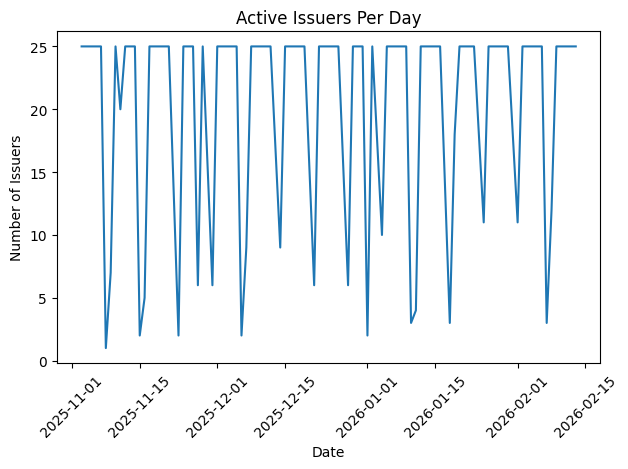


Common-sample shape (no missing values at all): (70, 25)


{'days_total': 93,
 'issuers': 25,
 'days_common': 70,
 'start': '2025-11-03',
 'end': '2026-02-13'}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

panel_path = "preliminary_issuer_panel.csv"
panel = pd.read_csv(panel_path, index_col=0)
panel.index = pd.to_datetime(panel.index)

print("Panel shape (Days x Issuers):", panel.shape)
print("\nFirst few rows:")
print(panel.head())


# missing value diagnostics
missing_by_issuer = panel.isna().sum()
missing_by_day = panel.isna().sum(axis=1)

print("\nMissing values per issuer:")
print(missing_by_issuer.sort_values(ascending=False))

print("\nDays with at least one missing issuer:", (missing_by_day > 0).sum())


# Percentage missing per issuer
pct_missing = (missing_by_issuer / len(panel)) * 100
print("\nPercent missing per issuer:")
print(pct_missing.sort_values(ascending=False))

# Plot number of active issuers per day
active_issuers_per_day = panel.notna().sum(axis=1)

plt.figure()
plt.plot(active_issuers_per_day)
plt.title("Active Issuers Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Issuers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Common sample restriction
common_sample = panel.dropna()
print("\nCommon-sample shape (no missing values at all):", common_sample.shape)

common_sample.head()
common = panel.dropna().sort_index()
common_path = "preliminary_issuer_panel_common70.csv"
common.to_csv(common_path)

summary = {
    "days_total": int(panel.shape[0]),
    "issuers": int(panel.shape[1]),
    "days_common": int(common.shape[0]),
    "start": str(common.index.min().date()),
    "end": str(common.index.max().date())
}
summary